# Projet : Ensembles classifiers in Class Imbalance Learning
    
## Nemanja Kostadinovic et Rebecca Leygonie

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab

from subprocess import call
from IPython.display import Image

import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.naive_bayes import GaussianNB
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, recall_score, classification_report, f1_score, make_scorer, precision_score


# 1 - Import et analyse exploratoire des données 

In [2]:
data = pd.read_csv("CarteBancaire.csv")
pd.set_option('display.max_columns', 35)

In [3]:
data.shape

(284807, 31)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
print('Count of duplicates:', data.duplicated().sum())

Count of duplicates: 1081


In [7]:
data = data.drop_duplicates()

In [8]:
print('Presence of null values:', data.isnull().sum().any())

Presence of null values: False


Text(0.5, 1.0, 'Distribution des classes du dataset')

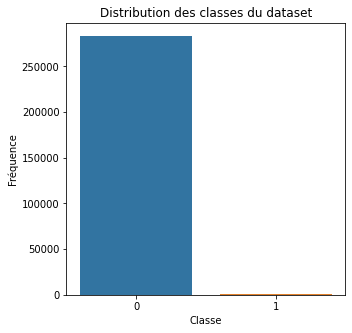

In [9]:
target, freq = np.unique(data['Class'], return_counts=True)

plt.figure(figsize=(5,5))
plt.ylabel('Fréquence', fontsize=10)
plt.xlabel('Classe', fontsize=10)
sns.barplot(target, freq)
plt.title('Distribution des classes du dataset')

In [10]:
freq

array([283253,    473])

Les classes (0: pas de fraude , 1: fraude) sont mal distribués si nous utilisons ces données avec notre modèle Random Forest nous allons certainement nous retrouver face à un problème de sur-apprentissage car le classifieur va supposer que dans la majorité des cas il n'y a pas de fraudes donc ne va pas pouvoir reconnaitre une opération frauduleuse et va prédire seulement la classe 0.

In [11]:
train = data.drop(['Class','Time','Amount'], axis='columns').copy()
train.sample(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
34380,1.123587,-0.294697,0.084302,0.265467,-0.046382,0.574608,-0.372450,0.29761,0.284187,0.080413,0.294070,-0.245132,-1.372574,0.657248,0.973587,0.733536,-0.767116,0.369704,0.117632,-0.061983,-0.085848,-0.445942,-0.094838,-1.179337,0.235899,0.314886,-0.030521,0.002082
19364,1.031784,-0.733888,0.031080,-1.824939,-0.897134,-1.191475,0.126963,-0.24592,1.851156,-1.712080,0.409495,1.558918,0.450715,0.164171,1.432555,-1.669933,0.569564,-0.869563,0.846033,0.121720,-0.059102,-0.104113,-0.091606,0.438456,0.561651,-0.900079,0.064549,0.043198
203635,-1.177089,1.090273,1.722230,2.522684,-1.030275,0.516655,-0.175731,0.41541,-1.426205,1.047086,-1.159150,-1.304258,-0.459061,0.206994,1.627957,0.594914,0.401948,0.246581,1.723679,0.032128,0.150900,0.313952,-0.005470,0.083062,-0.320053,2.790437,-0.550214,0.043932


In [12]:
y = data[['Class']].copy()
y.sample(3)

,Class
98233,0
223526,0
90619,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=0)

# 2 - Application des modèles sur les données d'origine

## 1. Modèles de Bagging 

### 1.1 BaggingClassifier

Un classificateur Bagging est un méta-estimateur d'ensemble qui ajuste les classificateurs de base chacun sur des sous-ensembles aléatoires de l'ensemble de données d'origine, puis agrège leurs prédictions individuelles (par vote ou par calcul de la moyenne) pour former une prédiction finale. 

In [14]:
clf = BaggingClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)

In [15]:
score

0.9994713283755683

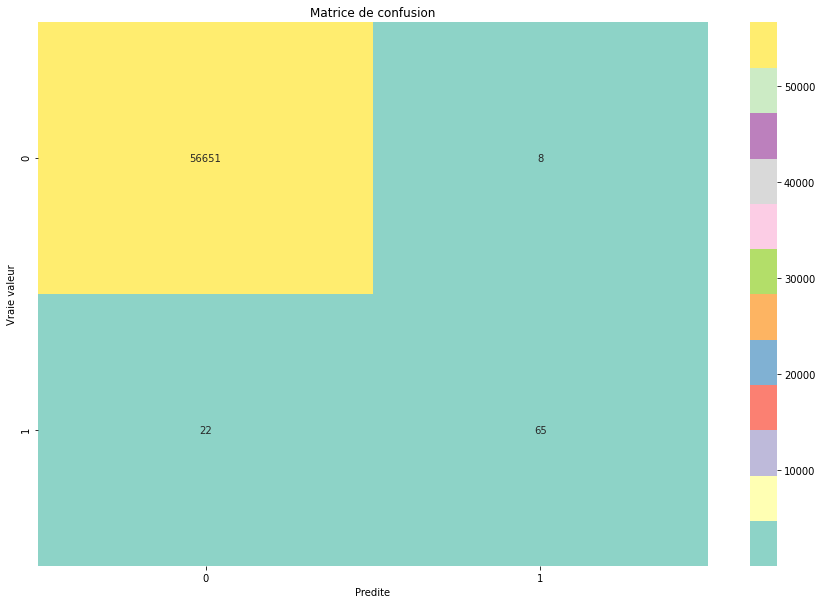

In [16]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [17]:
Bgcla_FN=conf_mat[1][0]/sum(conf_mat[1])*100
Bgcla_FP=conf_mat[0][1]/sum(conf_mat[0])*100

### 1.2 Logistic Regression

In [26]:
logbagClf = BaggingClassifier(LogisticRegression(random_state=0, solver='lbfgs'), n_estimators = 400, oob_score = True, random_state = 90)
logbagClf.fit(X_train, y_train.values.ravel())

/home/G20980/back_grid/notebooks/venv_grid/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/G20980/back_grid/notebooks/venv_grid/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

BaggingClassifier(base_estimator=LogisticRegression(random_state=0),
                  n_estimators=400, oob_score=True, random_state=90)

In [27]:
predicted = logbagClf.predict(X_test)
score = accuracy_score(y_test, predicted)
print(score)

0.9991365030134283


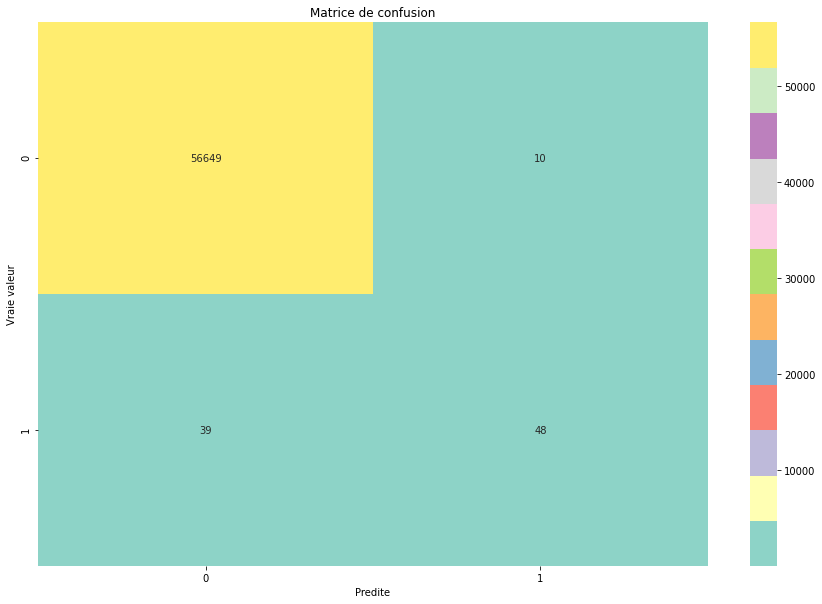

In [28]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [29]:
RL_FN=conf_mat[1][0]/sum(conf_mat[1])*100
RL_FP=conf_mat[0][1]/sum(conf_mat[0])*100

### 1.3 Gaussian Naïve Bayes

In [30]:
GNBbagClf = BaggingClassifier(GaussianNB(), n_estimators = 400, oob_score = True, random_state = 90)
GNBbagClf.fit(X_train, y_train.values.ravel())

BaggingClassifier(base_estimator=GaussianNB(), n_estimators=400, oob_score=True,
                  random_state=90)

In [31]:
predicted = logbagClf.predict(X_test)
score = accuracy_score(y_test, predicted)
print(score)

0.9991365030134283


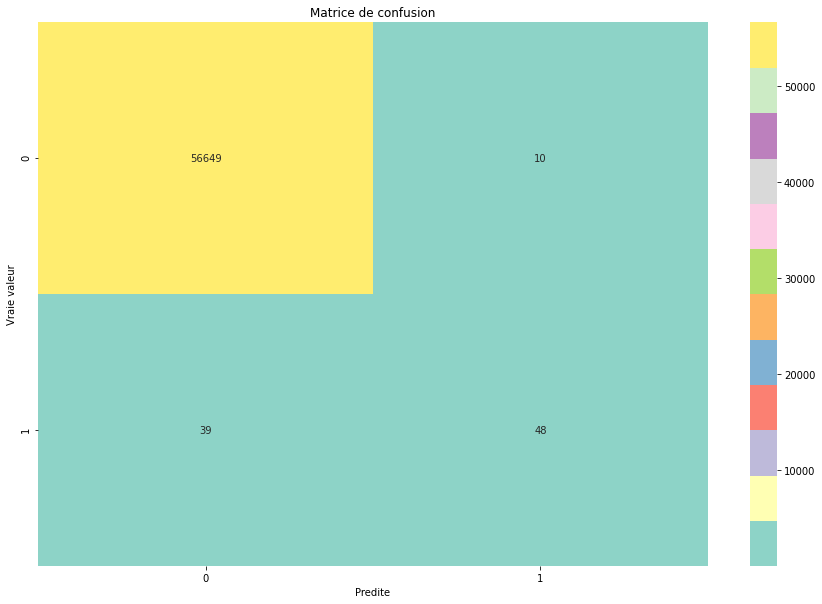

In [32]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [33]:
GNB_FN=conf_mat[1][0]/sum(conf_mat[1])*100
GNB_FP=conf_mat[0][1]/sum(conf_mat[0])*100

### 1.4 One class SVM

Text(0.5, 1.0, 'Distribution des classes du dataset')

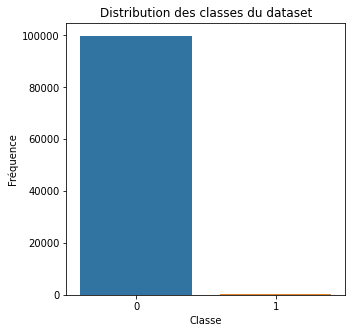

In [34]:
data_sampled = data.sample(100000)
target, freq = np.unique(data_sampled['Class'], return_counts=True)
plt.figure(figsize=(5,5))
plt.ylabel('Fréquence', fontsize=10)
plt.xlabel('Classe', fontsize=10)
sns.barplot(target, freq)
plt.title('Distribution des classes du dataset')

In [35]:
data_sampled.loc[data_sampled['Class'] == 1, "Class"] = -1
data_sampled.loc[data_sampled['Class'] == 0, "Class"] = 1

In [36]:
train_sampled = data_sampled.drop(['Class','Time','Amount'], axis='columns').copy()
train_sampled.sample(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
220037,2.236948,-0.463798,-2.084714,-0.804048,0.049640,-1.017064,-0.224189,-0.282772,-0.431771,0.301351,-0.725194,-1.110336,-0.492591,-1.180251,-0.062997,1.162262,1.241042,-1.127777,0.773407,-0.009059,-0.071875,-0.224184,0.175139,0.361389,0.027908,-0.293921,-0.034810,-0.032929
155057,-0.541021,-1.406677,0.975383,-1.504580,-1.042517,-0.498811,-0.494168,-1.034032,0.831329,-0.595377,-0.027917,-3.340508,1.514489,1.143033,-0.638429,1.722413,0.491987,-0.619058,-0.902912,0.545748,1.191179,0.199235,-1.009762,-0.024477,0.847481,-0.106353,0.049212,0.268114
283114,0.345687,0.321496,0.790972,-0.386242,0.079887,0.717938,-0.424456,-0.665202,0.453063,-0.533284,-0.063855,1.229503,1.186047,-0.172742,-0.265137,0.412798,-1.042361,0.968701,0.588596,-0.126706,0.940672,0.459140,-0.423923,-0.975511,0.921813,-0.012575,0.230464,0.231202


In [37]:
y_sampled = data_sampled[['Class']].copy()
y_sampled.sample(3)

,Class
179641,1
261126,1
192115,1


In [38]:
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(train_sampled, y_sampled, test_size=0.2, random_state=0)

In [39]:
X_train_sampled.shape

(80000, 28)

In [40]:
OSVM = BaggingClassifier(OneClassSVM(verbose=True), n_estimators = 5, oob_score = True, random_state = 90)
OSVM.fit(X_train_sampled, y_train_sampled.values.ravel())

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

/home/G20980/back_grid/notebooks/venv_grid/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/G20980/back_grid/notebooks/venv_grid/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:643: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=OneClassSVM(verbose=True), n_estimators=5,
                  oob_score=True, random_state=90)

In [41]:
predicted = OSVM.predict(X_test_sampled)

0.9977


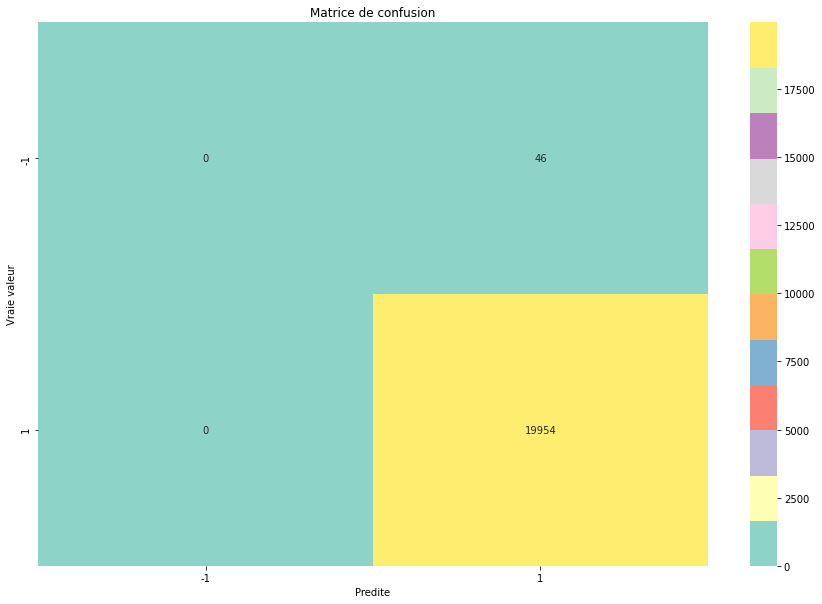

In [42]:
score = accuracy_score(y_test_sampled, predicted)
print(score)
conf_mat = confusion_matrix(y_test_sampled, predicted)
labels = ['-1','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [43]:
OSVM_FP=conf_mat[1][0]/sum(conf_mat[1])*100
OSVM_FN=conf_mat[0][1]/sum(conf_mat[0])*100

### 1.5 Random Forest 

Une forêt aléatoire est un méta estimateur qui ajuste un certain nombre de classificateurs d'arbres de décision sur divers sous-échantillons de l'ensemble de données et utilise la moyenne pour améliorer la précision prédictive et contrôler le surajustement.

In [18]:
clf=RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)

In [19]:
score

0.9995770627004547

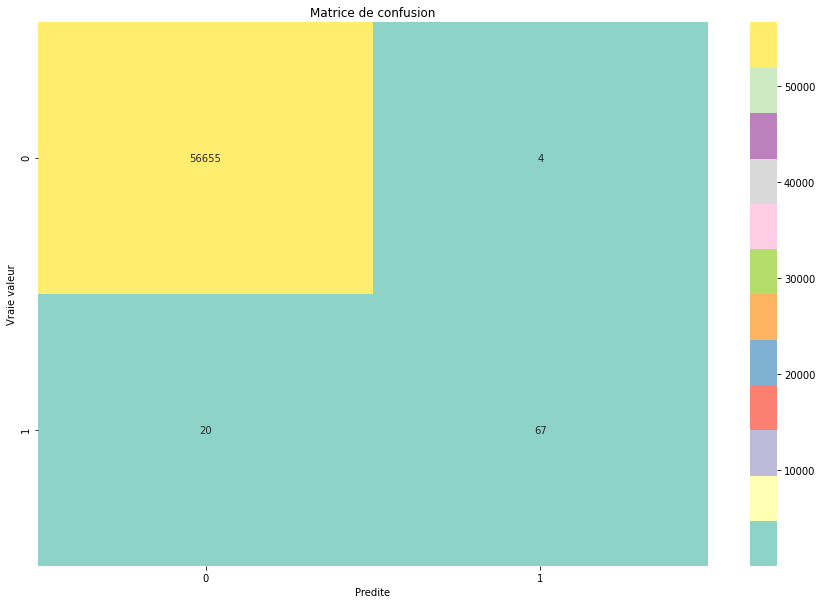

In [20]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [21]:
RF_FN=conf_mat[1][0]/sum(conf_mat[1])*100
RF_FP=conf_mat[0][1]/sum(conf_mat[0])*100

### 1.6  ExtraTreesClassifier

L'extra tree classifier met en œuvre un méta estimateur qui ajuste un certain nombre d'arbres de décision randomisés (alias extra-arbres) sur divers sous-échantillons de l'ensemble de données et utilise la moyenne pour améliorer la précision prédictive et contrôler le surajustement.

In [22]:
clf = ExtraTreesClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)

In [23]:
score

0.9995241955380115

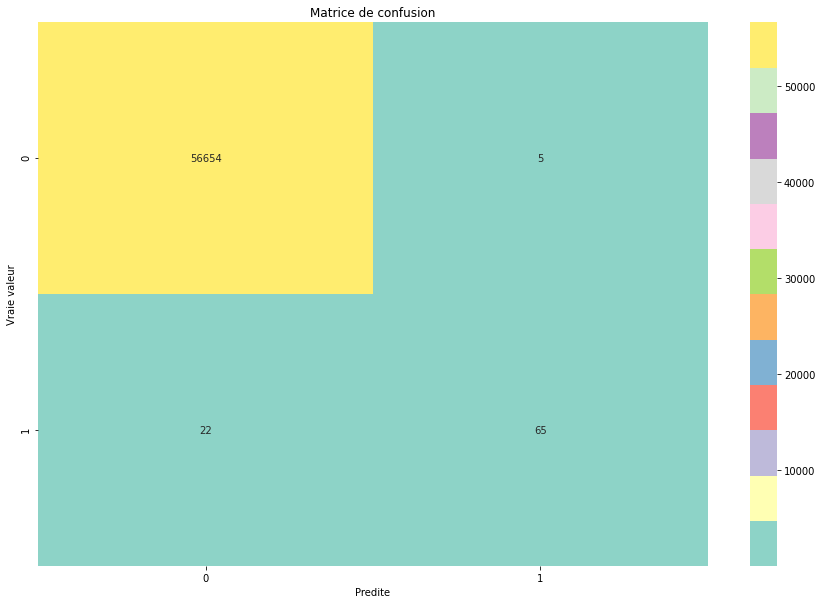

In [24]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [25]:
ETC_FN=conf_mat[1][0]/sum(conf_mat[1])*100
ETC_FP=conf_mat[0][1]/sum(conf_mat[0])*100

## 2. Modèles de Boosting

### 2.1 AdaBoostClassifier


Un classificateur AdaBoost est un méta-estimateur qui commence par adapter un classificateur à l'ensemble de données d'origine, puis adapte des copies supplémentaires du classificateur au même ensemble de données, mais où les poids des cas mal classés sont ajustés de telle sorte que les classificateurs suivants se concentrent davantage sur les cas difficiles.

In [44]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)

In [45]:
score

0.9991012582384662

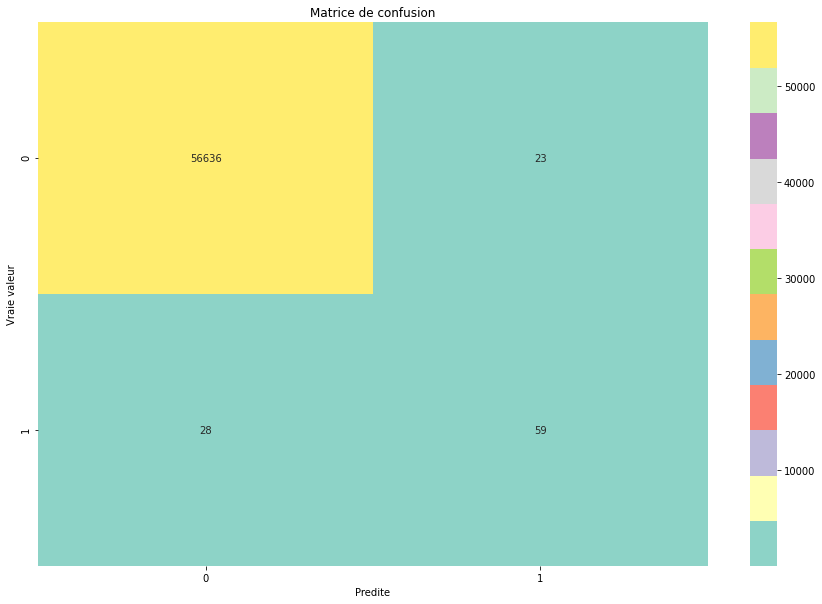

In [46]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [47]:
ABC_FN=conf_mat[1][0]/sum(conf_mat[1])*100
ABC_FP=conf_mat[0][1]/sum(conf_mat[0])*100

### 2.2 GradientBoostingClassifier

Le modèle Gradient Boosting construit un modèle additif de manière progressive, il permet d'optimiser des fonctions de perte arbitrairement différenciables. À chaque étape, des arbres de régression de n_classes_ sont ajustés sur le gradient négatif de la fonction de perte de déviance binomiale ou multinomiale.

In [48]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)

In [49]:
score

0.9991893701758714

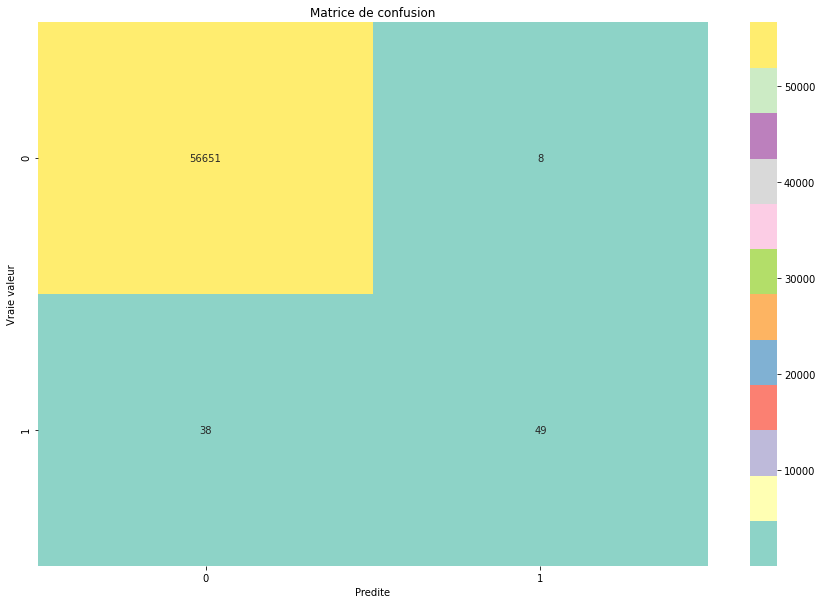

In [50]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [51]:
GBC_FN=conf_mat[1][0]/sum(conf_mat[1])*100
GBC_FP=conf_mat[0][1]/sum(conf_mat[0])*100

## Comparaison

[Text(0, 0, 'Bagging'),
 Text(1, 0, 'RandomForest  '),
 Text(2, 0, 'Extra Trees'),
 Text(3, 0, 'AdaBoost  '),
 Text(4, 0, 'GradientBoosting'),
 Text(5, 0, 'LogisticRegression'),
 Text(6, 0, 'Gaussian NaïveBayes'),
 Text(7, 0, 'OneClass SVM')]

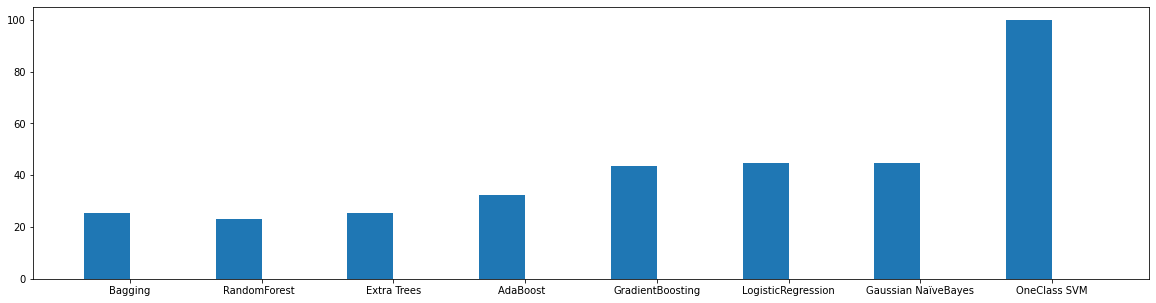

In [52]:
modèles = ['Bagging','RandomForest  ','Extra Trees','AdaBoost  ','GradientBoosting','LogisticRegression', 'Gaussian NaïveBayes', 'OneClass SVM']
FN = [Bgcla_FN,RF_FN,ETC_FN,ABC_FN,GBC_FN,RL_FN,GNB_FN,OSVM_FN]
FP = [Bgcla_FP,RF_FP,ETC_FP,ABC_FP,GBC_FP,RL_FP,GNB_FP,OSVM_FP]
# Position sur l'axe des x pour chaque étiquette
position = np.arange(len(modèles))
# Largeur des barres
largeur = .35

# Création de la figure et d'un set de sous-graphiques
fig, ax = plt.subplots(figsize=(20, 5))
r1 = ax.bar(position - largeur/2, FN, largeur)
r2 = ax.bar(position + largeur/2, FP, largeur)

# Modification des marques sur l'axe des x et de leurs étiquettes
ax.set_xticks(position)
ax.set_xticklabels(modèles)

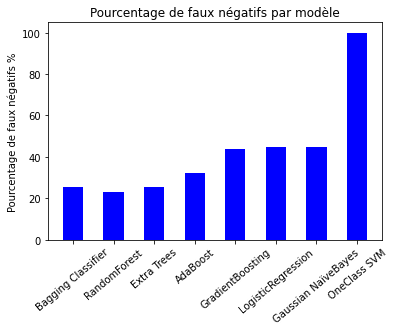

In [53]:
fig = plt.figure()

x = [1,2,3,4,5,6,7,8]
height1 = [Bgcla_FN,RF_FN,ETC_FN,ABC_FN,GBC_FN,RL_FN,GNB_FN,OSVM_FN]
height2 = [Bgcla_FP,Bgcla_FP,ETC_FP,ABC_FP,GBC_FP,RL_FP,GNB_FP,OSVM_FP]
width = 0.5
BarName = ['Bagging Classifier','RandomForest','Extra Trees','AdaBoost','GradientBoosting','LogisticRegression', 'Gaussian NaïveBayes','OneClass SVM']

plt.bar(x, height1, width,color='b' )
plt.bar(x, height2, width,color='b' )
#plt.scatter([i+width/2.0 for i in x],height,s=40)

#plt.xlim(0,6)
#plt.ylim(0,100)
#plt.grid()

plt.ylabel('Pourcentage de faux négatifs %')
plt.title('Pourcentage de faux négatifs par modèle')

pylab.xticks(x, BarName, rotation=40)

plt.savefig('SimpleBar.png')
plt.show()

# 2 - Application des modèles sur des données sous-échantilloné (under-sampling)

In [54]:
rus = RandomUnderSampler()
X_under_sampled, y_under_sampled = rus.fit_resample(train, y)

In [55]:
train.shape

(283726, 28)

In [56]:
y.shape

(283726, 1)

In [57]:
X_under_sampled.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
143,1.966324,-0.445337,-0.422202,-0.049476,-0.482471,-0.018006,-0.694890,0.192866,1.123797,-0.038581,0.899893,0.950397,-0.437013,0.222879,0.119266,0.390863,-0.682781,0.215134,0.256025,-0.217164,-0.148751,-0.357669,0.432182,0.664447,-0.545301,-0.332089,0.001813,-0.041297
846,1.862102,-0.124052,-1.989752,0.382609,0.473032,-0.674517,0.298621,-0.282416,0.802053,-0.989431,-0.491112,0.903819,1.366524,-1.886162,-0.194861,0.086837,0.978546,0.055604,0.189131,0.150727,-0.204158,-0.511441,0.077874,0.388335,0.007896,-0.120980,-0.019579,0.006155
721,1.082566,1.094862,-1.367020,2.012554,0.708142,-0.807712,0.151952,0.158353,0.009872,-1.925278,2.605937,-0.309219,-1.767549,-4.429195,-0.171940,1.055514,3.970587,1.762249,-0.880812,-0.135789,-0.325284,-0.734344,-0.106725,-0.224999,0.569167,-0.335033,0.089140,0.112337
116,-0.286363,0.853433,-0.304236,-1.114282,2.539486,3.271654,0.122745,0.934263,-0.504529,-0.447100,-0.010366,-0.332826,-0.078910,-0.258235,1.097898,0.715871,-0.482640,0.324772,0.282196,0.228748,-0.318523,-1.006167,-0.048094,0.935447,-0.006223,0.088024,0.246916,0.091139
852,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,-4.250717,4.182162,-4.563675,1.182503,-6.964972,1.115340,-4.997332,-6.419539,-1.183593,3.569733,2.109403,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568


In [58]:
len(X_under_sampled) 

946

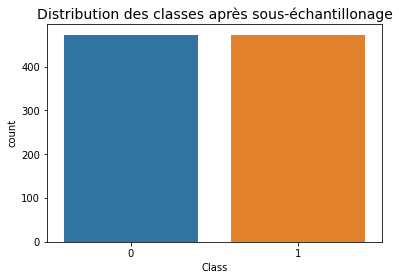

In [59]:
sns.countplot('Class', data= y_under_sampled)
plt.title('Distribution des classes après sous-échantillonage', fontsize=14)
plt.show()

In [60]:
y_under_sampled

,Class
0,0
1,0
2,0
3,0
4,0
...,...
941,1
942,1
943,1
944,1


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_under_sampled, y_under_sampled, test_size=0.2, random_state=0)

In [62]:
X_train.shape

(756, 28)

In [63]:
X_test.shape

(190, 28)

## 1. Modèles de Bagging

### 1.1 BaggingClassifier

In [76]:
clf = BaggingClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)

In [77]:
score

0.9263157894736842

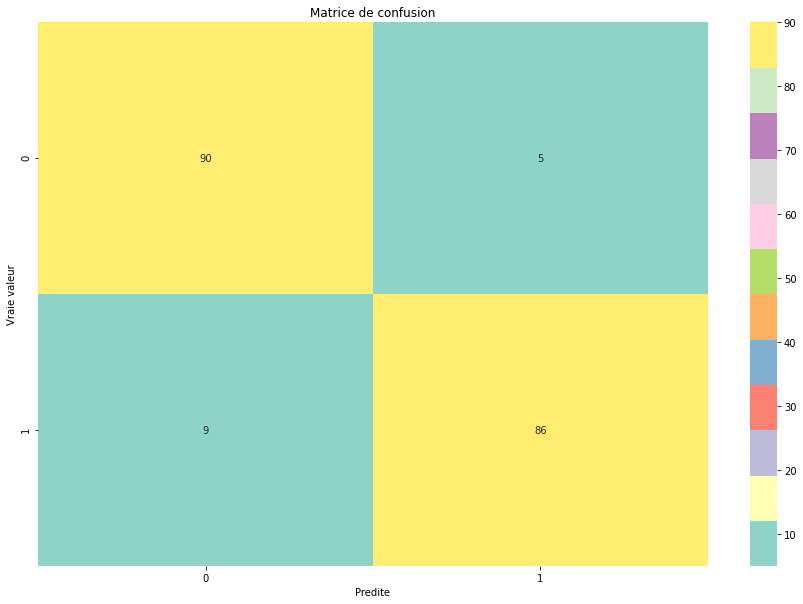

In [78]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [79]:
Bgcla_FN2=conf_mat[1][0]/sum(conf_mat[1])*100
Bgcla_FP2=conf_mat[0][1]/sum(conf_mat[0])*100

### 1.2 Logistic Regression

In [64]:
logbagClf = BaggingClassifier(LogisticRegression(random_state=0, solver='lbfgs'), n_estimators = 400, oob_score = True, random_state = 90)
logbagClf.fit(X_train, y_train.values.ravel())
predicted = logbagClf.predict(X_test)
score = accuracy_score(y_test, predicted)
print(score)

0.9315789473684211


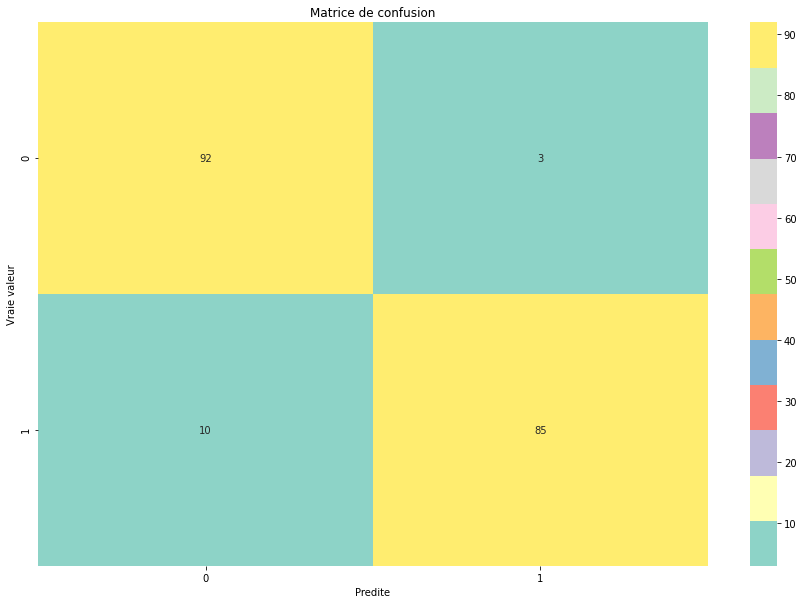

In [65]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [66]:
RL_FN2=conf_mat[1][0]/sum(conf_mat[1])*100
RL_FP2=conf_mat[0][1]/sum(conf_mat[0])*100

### 1.3 Gaussian Naives Bayes

In [67]:
GNBbagClf = BaggingClassifier(GaussianNB(), n_estimators = 400, oob_score = True, random_state = 90)
GNBbagClf.fit(X_train, y_train.values.ravel())
predicted = GNBbagClf.predict(X_test)
score = accuracy_score(y_test, predicted)
print(score)

0.9157894736842105


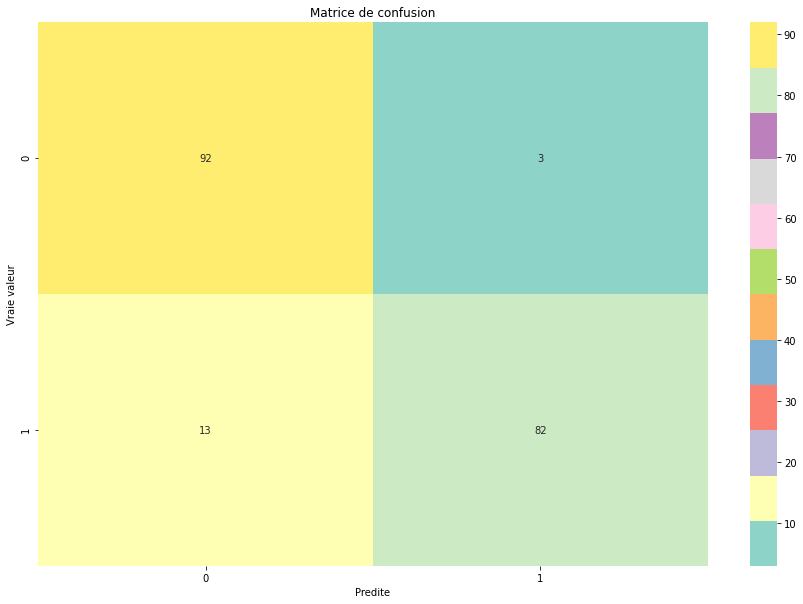

In [68]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [69]:
GNB_FN2=conf_mat[1][0]/sum(conf_mat[1])*100
GNB_FP2=conf_mat[0][1]/sum(conf_mat[0])*100

### 1.4  One class SVM

In [70]:
y_under_train_OCSVM= y_train.copy()
y_under_test_OCSVM= y_test.copy()

In [71]:
y_under_train_OCSVM.loc[y_under_train_OCSVM['Class'] == 1, "Class"] = -1
y_under_train_OCSVM.loc[y_under_train_OCSVM['Class'] == 0, "Class"] = 1

y_under_test_OCSVM.loc[y_under_test_OCSVM['Class'] == 1, "Class"] = -1
y_under_test_OCSVM.loc[y_under_test_OCSVM['Class'] == 0, "Class"] = 1

In [72]:
OSVM = BaggingClassifier(OneClassSVM(verbose=True), n_estimators = 5, oob_score = True, random_state = 90)
OSVM.fit(X_train, y_under_train_OCSVM.values.ravel())

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

/home/G20980/back_grid/notebooks/venv_grid/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/G20980/back_grid/notebooks/venv_grid/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:643: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=OneClassSVM(verbose=True), n_estimators=5,
                  oob_score=True, random_state=90)

In [73]:
predicted = OSVM.predict(X_test)

0.5


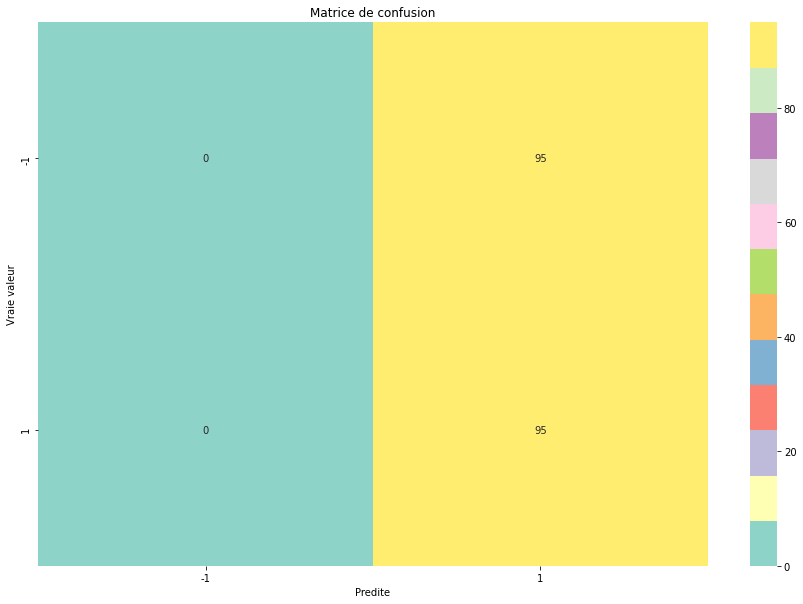

In [74]:
score = accuracy_score(y_under_test_OCSVM, predicted)
print(score)
conf_mat = confusion_matrix(y_under_test_OCSVM, predicted)
labels = ['-1','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [75]:
OSVM_FP2=conf_mat[1][0]/sum(conf_mat[1])*100
OSVM_FN2=conf_mat[0][1]/sum(conf_mat[0])*100

### 1.5 Random Forest

In [80]:
clf=RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)

In [81]:
score

0.9421052631578948

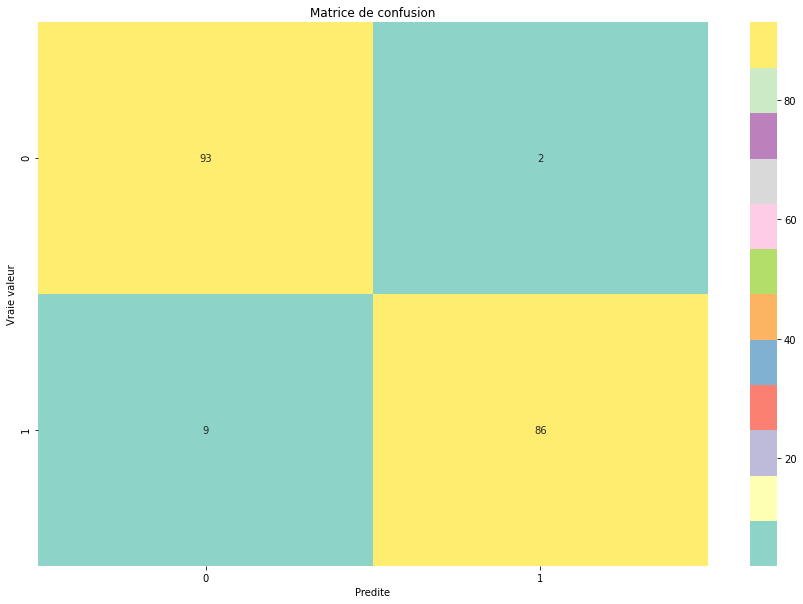

In [82]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [83]:
RF_FN2=conf_mat[1][0]/sum(conf_mat[1])*100
RF_FP2=conf_mat[0][1]/sum(conf_mat[0])*100

### 1.6 ExtraTreesClassifier

In [84]:
clf = ExtraTreesClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)

In [85]:
score

0.9315789473684211

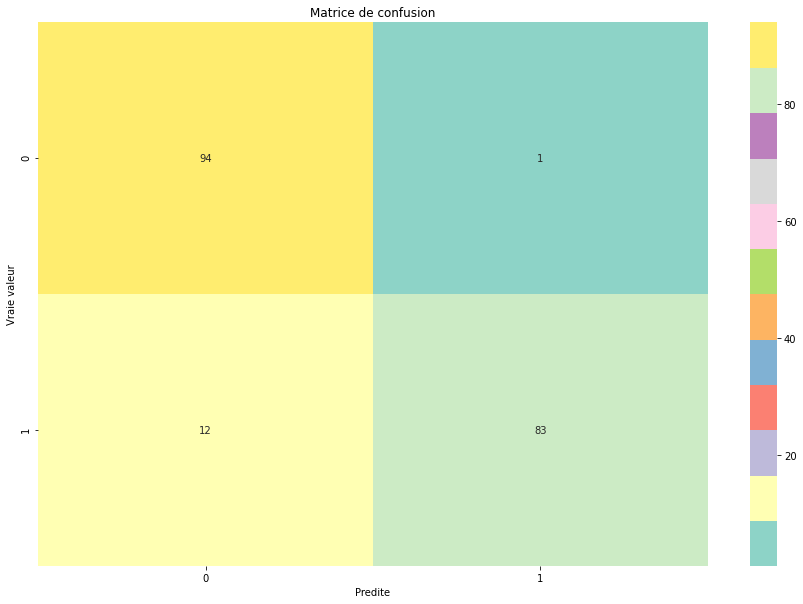

In [86]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [87]:
ET_FN2=conf_mat[1][0]/sum(conf_mat[1])*100
ET_FP2=conf_mat[0][1]/sum(conf_mat[0])*100

## 2 Modèles de Boosting

### 2.1 AdaBoostClassifier

In [88]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)

In [89]:
score

0.9263157894736842

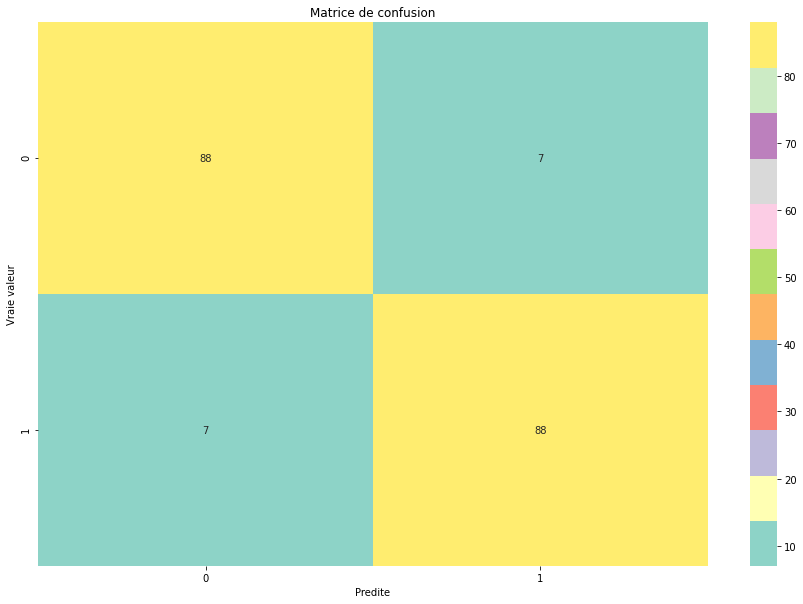

In [90]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [91]:
AB_FN2=conf_mat[1][0]/sum(conf_mat[1])*100
AB_FP2=conf_mat[0][1]/sum(conf_mat[0])*100

### 2.2 GradientBoostingClassifier

In [92]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)

In [93]:
score

0.9263157894736842

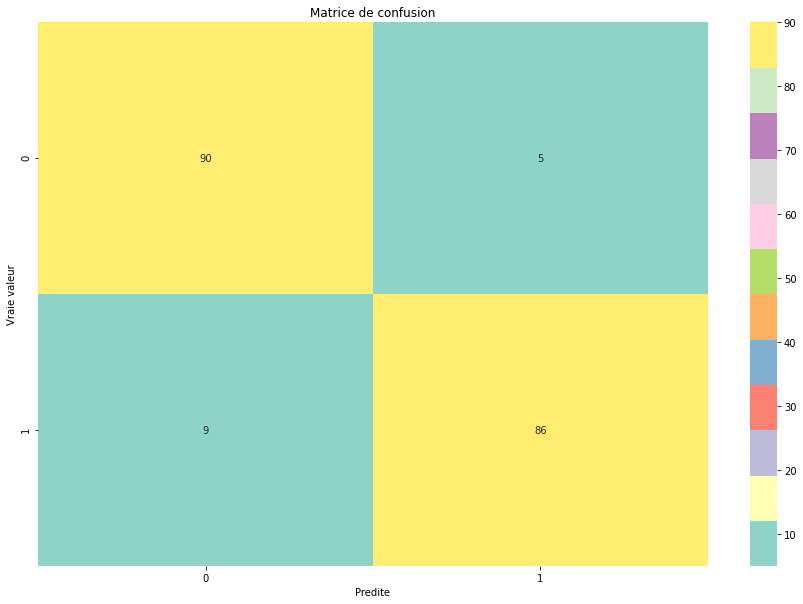

In [94]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [95]:
GB_FN2=conf_mat[1][0]/sum(conf_mat[1])*100
GB_FP2=conf_mat[0][1]/sum(conf_mat[0])*100

[Text(0, 0, 'Bagging'),
 Text(1, 0, 'RandomForest  '),
 Text(2, 0, 'Extra Trees'),
 Text(3, 0, 'AdaBoost  '),
 Text(4, 0, 'GradientBoosting'),
 Text(5, 0, 'RegressionLogistic'),
 Text(6, 0, 'Gaussian NaiveBayes'),
 Text(7, 0, 'OneClass SVM')]

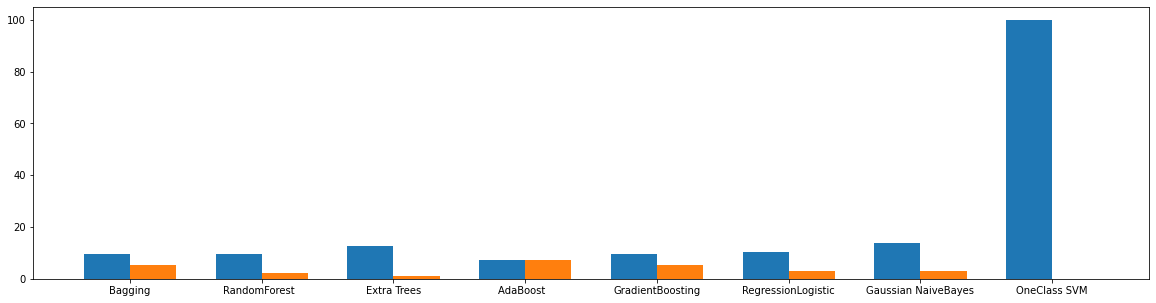

In [96]:
modèles = ['Bagging','RandomForest  ','Extra Trees','AdaBoost  ','GradientBoosting','RegressionLogistic','Gaussian NaiveBayes','OneClass SVM']
FN = [Bgcla_FN2,RF_FN2,ET_FN2,AB_FN2,GB_FN2,RL_FN2,GNB_FN2,OSVM_FN2]
FP = [Bgcla_FP2,RF_FP2,ET_FP2,AB_FP2,GB_FP2,RL_FP2,GNB_FP2,OSVM_FP2]
# Position sur l'axe des x pour chaque étiquette
position = np.arange(len(modèles))
# Largeur des barres
largeur = .35

# Création de la figure et d'un set de sous-graphiques
fig, ax = plt.subplots(figsize=(20, 5))
r1 = ax.bar(position - largeur/2, FN, largeur)
r2 = ax.bar(position + largeur/2, FP, largeur)

# Modification des marques sur l'axe des x et de leurs étiquettes
ax.set_xticks(position)
ax.set_xticklabels(modèles)

# 3 - Application des modèles sur des données sur-échantillonées (over-sampling)

In [97]:
rus = RandomOverSampler()
X_over_sampled, y_over_sampled = rus.fit_resample(train, y)

In [98]:
len(X_over_sampled) 

566506

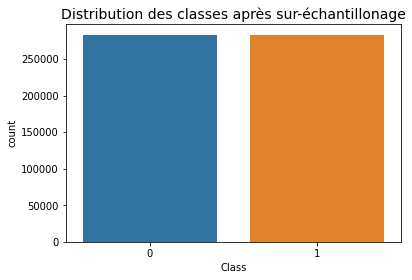

In [99]:
sns.countplot('Class', data= y_over_sampled)
plt.title('Distribution des classes après sur-échantillonage', fontsize=14)
plt.show()

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_over_sampled, y_over_sampled, test_size=0.2, random_state=0)

## 1 Modèles de Bagging

### 1.1 BaggingClassifier

In [115]:
clf = BaggingClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)

In [116]:
score

0.9998852623960742

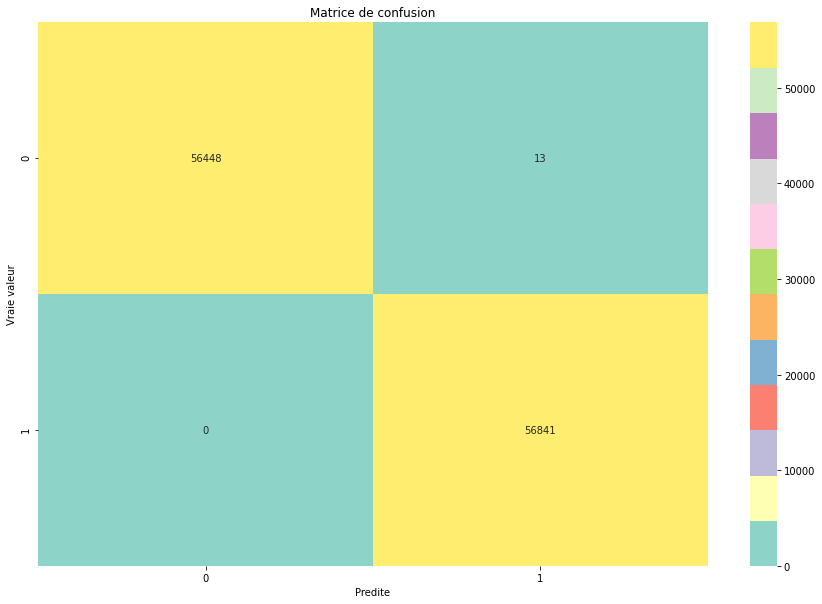

In [117]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [118]:
Bgcla_FN3=conf_mat[1][0]/sum(conf_mat[1])*100
Bgcla_FP3=conf_mat[0][1]/sum(conf_mat[0])*100

### 1.2 Logistic Regression

In [101]:
logbagClf = BaggingClassifier(LogisticRegression(random_state=0, solver='lbfgs'), n_estimators = 400, oob_score = True, random_state = 90)
logbagClf.fit(X_train, y_train.values.ravel())
predicted = logbagClf.predict(X_test)
score = accuracy_score(y_test, predicted)
print(score)

0.9453584226227251


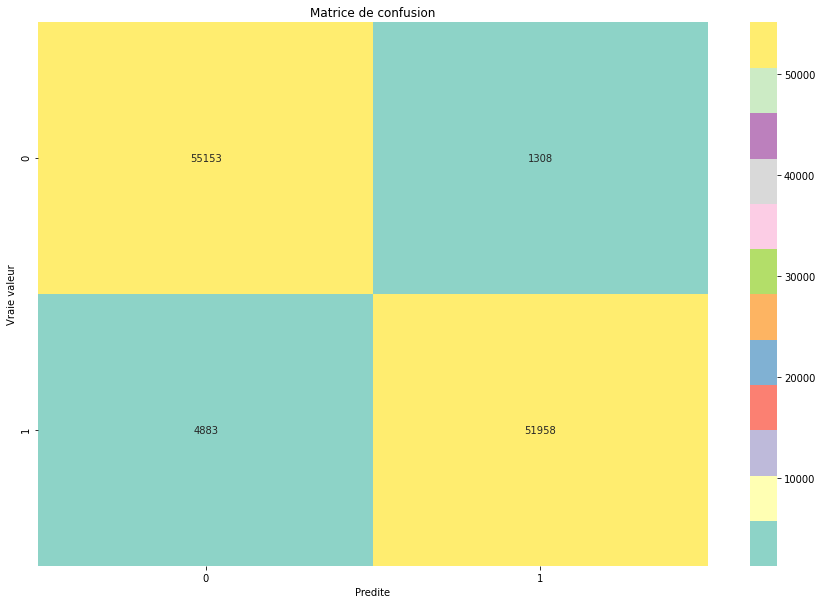

In [102]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [103]:
RL_FN3=conf_mat[1][0]/sum(conf_mat[1])*100
RL_FP3=conf_mat[0][1]/sum(conf_mat[0])*100

### 1.3 Gaussian Naives Bayes

In [104]:
GNBbagClf = BaggingClassifier(GaussianNB(), n_estimators = 400, oob_score = True, random_state = 90)
GNBbagClf.fit(X_train, y_train.values.ravel())
predicted = GNBbagClf.predict(X_test)
score = accuracy_score(y_test, predicted)
print(score)

0.9126140756562109


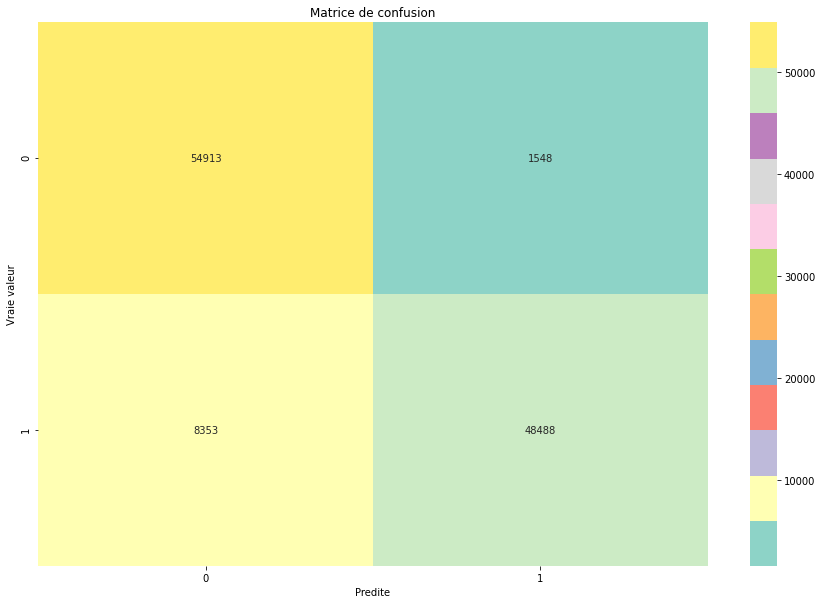

In [105]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [106]:
GNB_FN3=conf_mat[1][0]/sum(conf_mat[1])*100
GNB_FP3=conf_mat[0][1]/sum(conf_mat[0])*100

### 1.4 One class SVM

In [107]:
y_train_under_OCSVM = y_train.head(100000).copy()
y_test_under_OCSVM = y_test.copy()
X_train_under_OCSVM = X_train.head(100000).copy()

Text(0.5, 1.0, "Distribution des classes du dataset d'apprentissage")

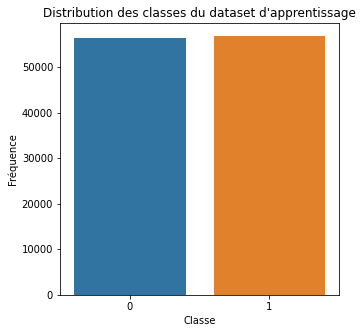

In [108]:
target, freq = np.unique(y_test_under_OCSVM['Class'], return_counts=True)
plt.figure(figsize=(5,5))
plt.ylabel('Fréquence', fontsize=10)
plt.xlabel('Classe', fontsize=10)
sns.barplot(target, freq)
plt.title('Distribution des classes du dataset d\'apprentissage')

Text(0.5, 1.0, 'Distribution des classes du dataset de test')

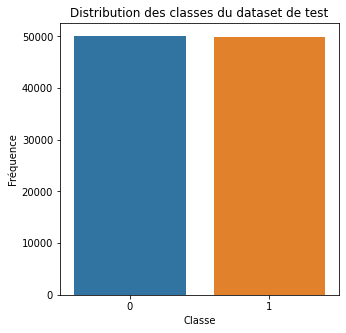

In [109]:
target, freq = np.unique(y_train_under_OCSVM['Class'], return_counts=True)
plt.figure(figsize=(5,5))
plt.ylabel('Fréquence', fontsize=10)
plt.xlabel('Classe', fontsize=10)
sns.barplot(target, freq)
plt.title('Distribution des classes du dataset de test')

In [110]:
y_train_under_OCSVM.loc[y_train_under_OCSVM['Class'] == 1, "Class"] = -1
y_train_under_OCSVM.loc[y_train_under_OCSVM['Class'] == 0, "Class"] = 1

y_test_under_OCSVM.loc[y_test_under_OCSVM['Class'] == 1, "Class"] = -1
y_test_under_OCSVM.loc[y_test_under_OCSVM['Class'] == 0, "Class"] = 1

In [111]:
OSVM = BaggingClassifier(OneClassSVM(verbose=True), n_estimators = 5, oob_score = True, random_state = 90)
OSVM.fit(X_train_under_OCSVM, y_train_under_OCSVM.values.ravel())

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

/home/G20980/back_grid/notebooks/venv_grid/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/G20980/back_grid/notebooks/venv_grid/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:643: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=OneClassSVM(verbose=True), n_estimators=5,
                  oob_score=True, random_state=90)

In [112]:
predicted = OSVM.predict(X_test)

0.4983230657887769


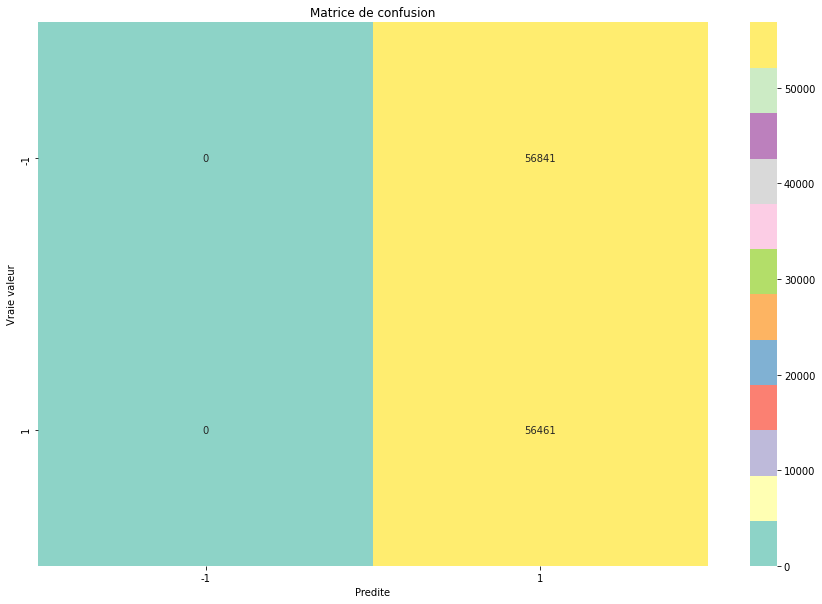

In [113]:
score = accuracy_score(y_test_under_OCSVM, predicted)
print(score)
conf_mat = confusion_matrix(y_test_under_OCSVM, predicted)
labels = ['-1','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [114]:
OSVM_FP3=conf_mat[1][0]/sum(conf_mat[1])*100
OSVM_FN3=conf_mat[0][1]/sum(conf_mat[0])*100

### 1.5 Random Forest

In [119]:
clf=RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)

In [120]:
score

0.9999470441828034

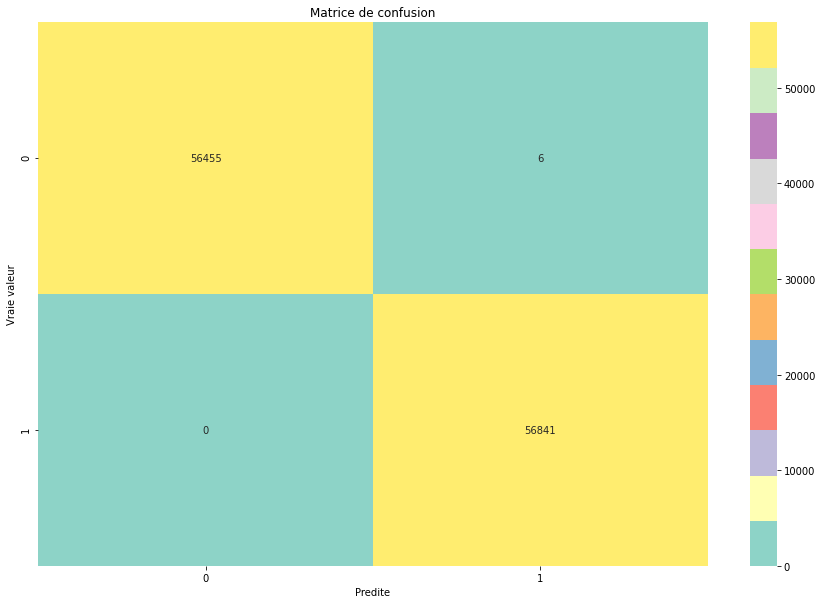

In [121]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [122]:
RF_FN3=conf_mat[1][0]/sum(conf_mat[1])*100
RF_FP3=conf_mat[0][1]/sum(conf_mat[0])*100

### 1.6 ExtraTrees Classifier

In [123]:
clf = ExtraTreesClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)

In [124]:
score

0.9999382182132708

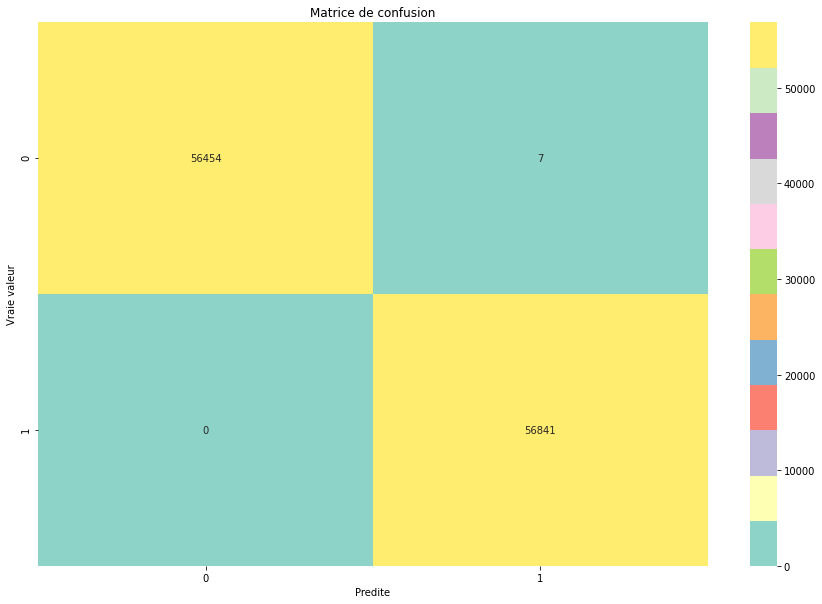

In [125]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [126]:
ET_FN3=conf_mat[1][0]/sum(conf_mat[1])*100
ET_FP3=conf_mat[0][1]/sum(conf_mat[0])*100

# 2 Boosting

## 2.1 AdaBoostClassifier

In [127]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)

In [128]:
score

0.9641930416056204

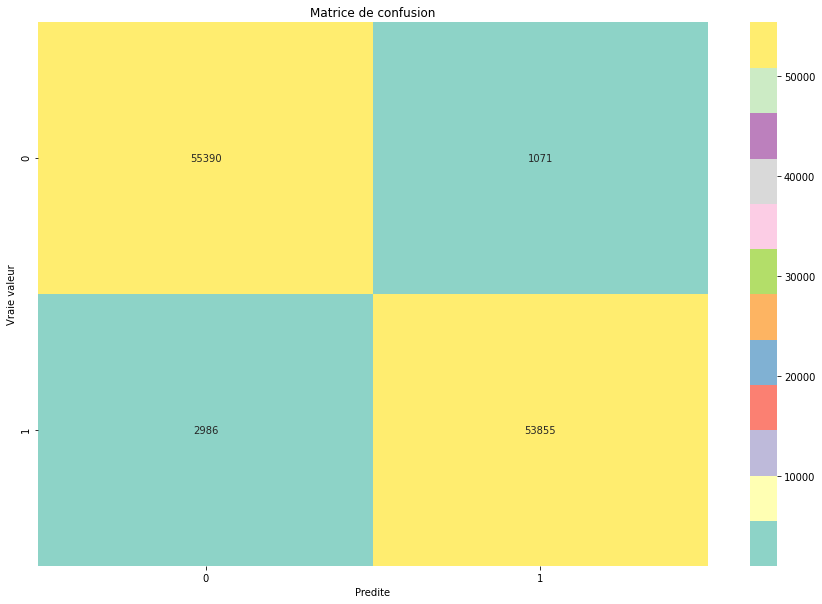

In [129]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [130]:
AB_FN3=conf_mat[1][0]/sum(conf_mat[1])*100
AB_FP3=conf_mat[0][1]/sum(conf_mat[0])*100

## 2.2 GradientBoostingClassifier

In [131]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)

In [132]:
score

0.9946514624631516

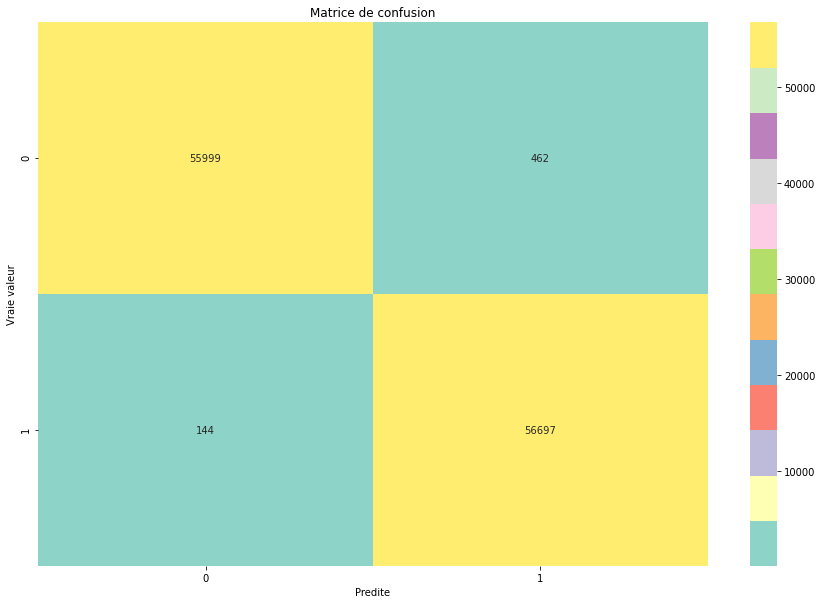

In [133]:
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

In [134]:
GB_FN3=conf_mat[1][0]/sum(conf_mat[1])*100
GB_FP3=conf_mat[0][1]/sum(conf_mat[0])*100

In [135]:
np.arange(10,2)

array([], dtype=int64)

## Comparatif

[Text(0, 0, 'Bagging'),
 Text(1, 0, 'RandomForest  '),
 Text(2, 0, 'Extra Trees'),
 Text(3, 0, 'AdaBoost  '),
 Text(4, 0, 'GradientBoosting'),
 Text(5, 0, 'RegressionLogistic'),
 Text(6, 0, 'Gaussian Naïve Bayes'),
 Text(7, 0, 'OneClass SVM')]

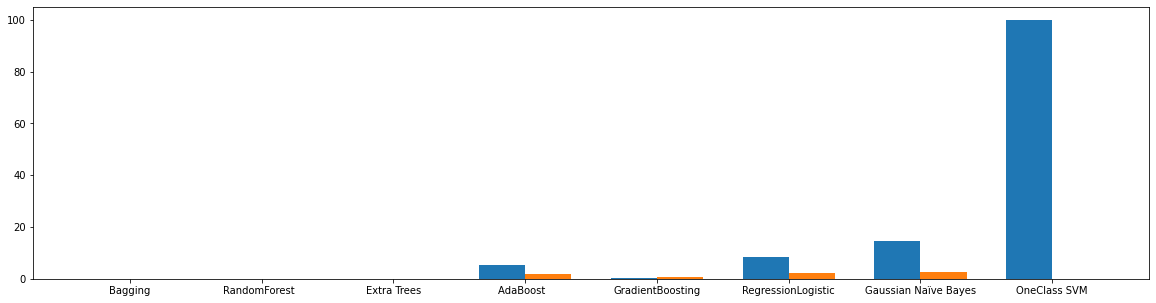

In [136]:
modèles = ['Bagging','RandomForest  ','Extra Trees','AdaBoost  ','GradientBoosting','RegressionLogistic', "Gaussian Naïve Bayes",'OneClass SVM']
FN = [Bgcla_FN3,RF_FN3,ET_FN3,AB_FN3,GB_FN3,RL_FN3,GNB_FN3,OSVM_FN3]
FP = [Bgcla_FP3,RF_FP3,ET_FP3,AB_FP3,GB_FP3,RL_FP3,GNB_FP3,OSVM_FP3]
# Position sur l'axe des x pour chaque étiquette
position = np.arange(len(modèles))
# Largeur des barres
largeur = .35

# Création de la figure et d'un set de sous-graphiques
fig, ax = plt.subplots(figsize=(20, 5))
r1 = ax.bar(position - largeur/2, FN, largeur)
r2 = ax.bar(position + largeur/2, FP, largeur)



# Modification des marques sur l'axe des x et de leurs étiquettes
ax.set_xticks(position)
ax.set_xticklabels(modèles)

[Text(0, 0, 'Bagging'), Text(1, 0, 'RandomForest '), Text(2, 0, 'Extra Trees')]

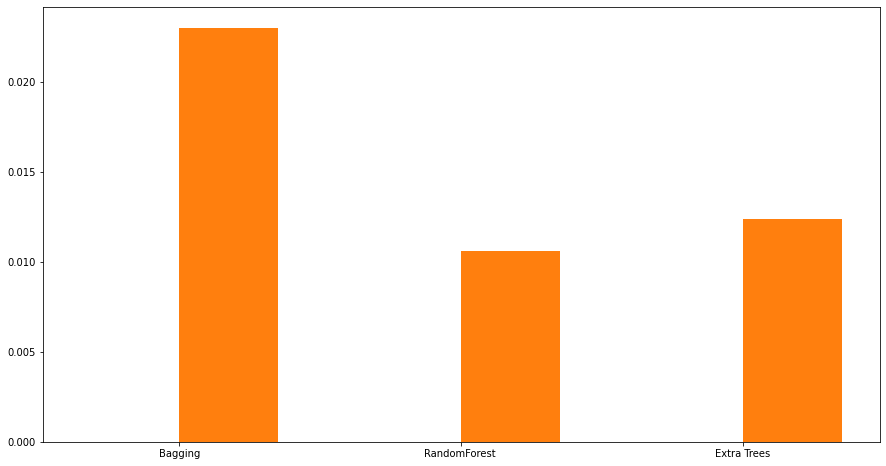

In [138]:
modèles = ['Bagging','RandomForest ','Extra Trees']
FN = [Bgcla_FN3,RF_FN3,ET_FN3]
FP = [Bgcla_FP3,RF_FP3,ET_FP3]
# Position sur l'axe des x pour chaque étiquette
position = np.arange(len(modèles))
# Largeur des barres
largeur = .35

# Création de la figure et d'un set de sous-graphiques
fig, ax = plt.subplots(figsize=(15,8))
r1 = ax.bar(position - largeur/2, FN, largeur)
r2 = ax.bar(position + largeur/2, FP, largeur)

# Modification des marques sur l'axe des x et de leurs étiquettes
ax.set_xticks(position)
ax.set_xticklabels(modèles)

## Test de modèles adaptés pour les données déséquilibrées

In [139]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=0)

0.9724738307545906


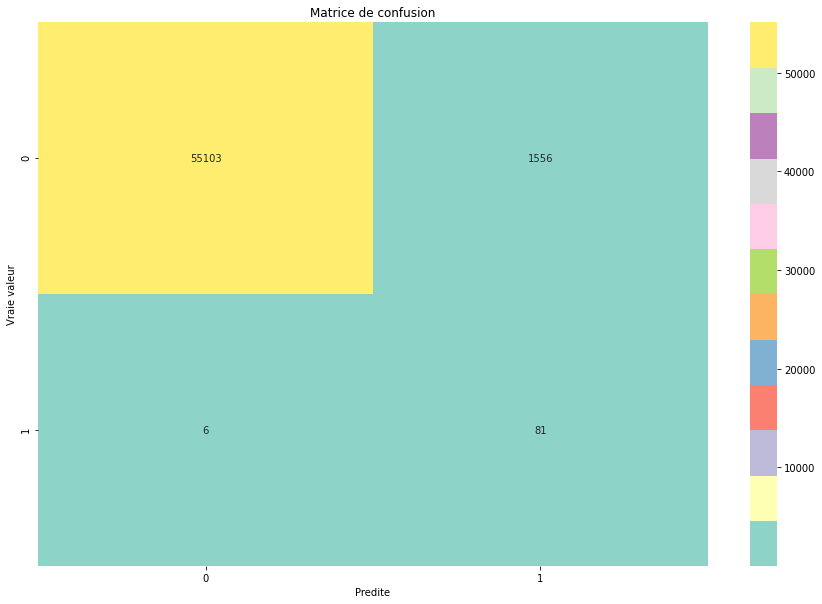

In [140]:
from imblearn.ensemble import BalancedRandomForestClassifier
clf = BalancedRandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)
print(score)
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

0.9765974694251577


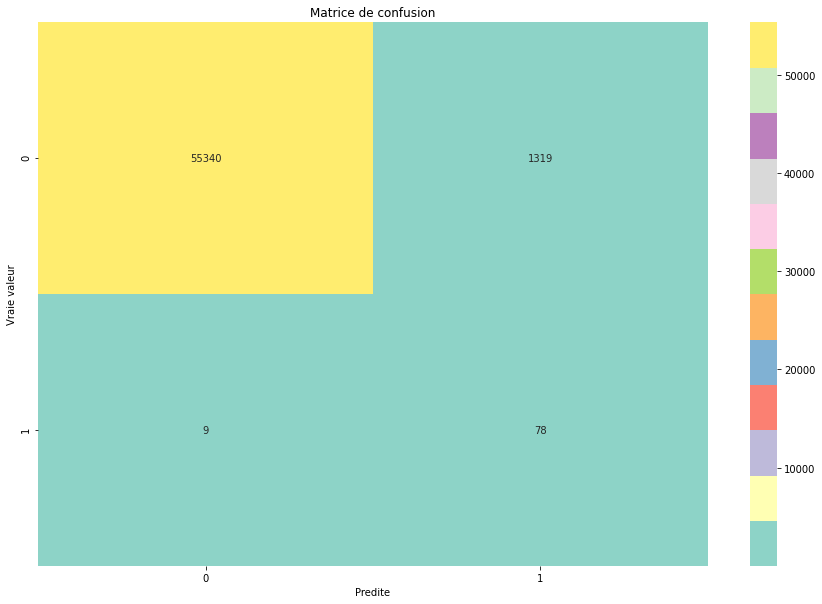

In [141]:
from imblearn.ensemble import BalancedBaggingClassifier 
clf = BalancedBaggingClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)
print(score)
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

0.9532301836252776


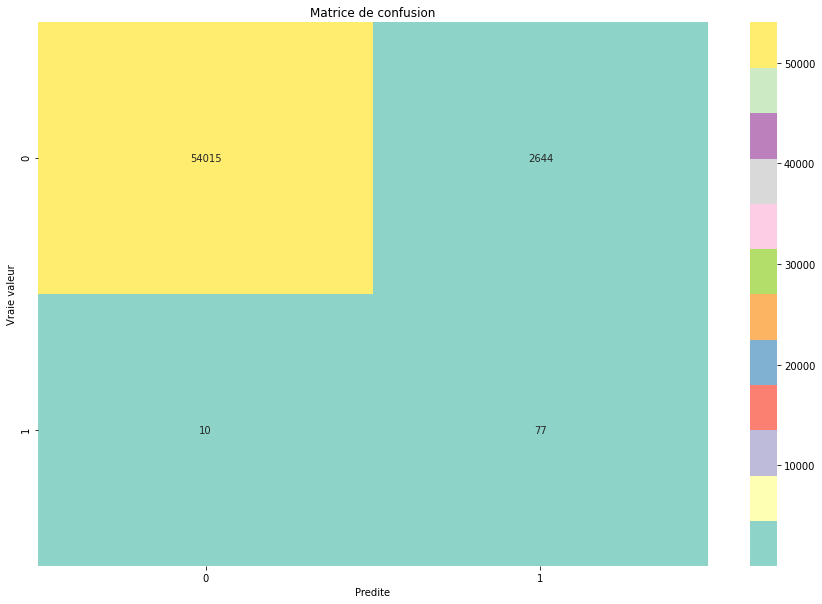

In [142]:
from imblearn.ensemble import RUSBoostClassifier
clf = RUSBoostClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)
print(score)
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()

0.9598033341557114


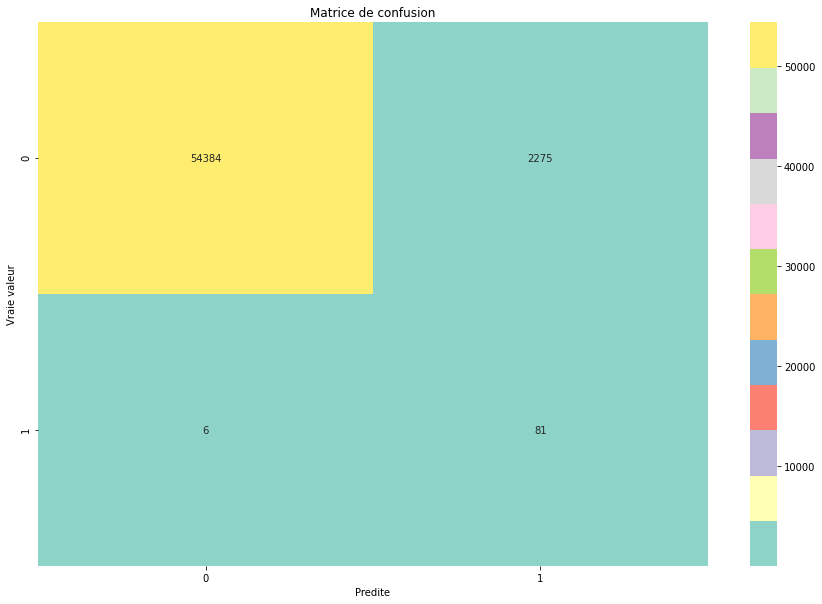

In [143]:
from imblearn.ensemble import EasyEnsembleClassifier
clf = EasyEnsembleClassifier()
clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
score = accuracy_score(y_test, predicted)
print(score)
conf_mat = confusion_matrix(y_test, predicted)
labels = ['0','1']
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, cmap="Set3", fmt="d", xticklabels = labels, yticklabels = labels)
plt.ylabel('Vraie valeur')
plt.xlabel('Predite')
plt.title('Matrice de confusion')
plt.show()